# Package import

In [1]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Input reference frame

In [2]:
imgs_path  ='frames/'
fnames = os.listdir(imgs_path)
fnames

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png']

# Generate frame used to track

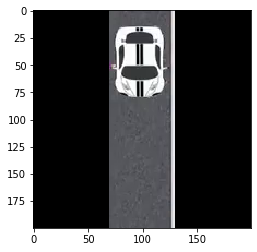

In [3]:
reference_frame = cv2.imread(imgs_path + fnames[0])
h,w = reference_frame.shape[:2]
plt.imshow(reference_frame)
plt.show()

reference_keypoint :  [96 47]


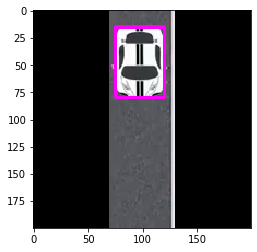

In [4]:
reference_frame_with_kp = reference_frame.copy()
x1,y1,x2,y2 = 72,14,120,80
window_w, window_h = x2-x1,y2-y1
reference_keypoint = np.array([(x2+x1)/2,(y2+y1)/2]).astype(int)
print('reference_keypoint : ', reference_keypoint)
cv2.rectangle(reference_frame_with_kp, (75,15),(120,80), (255,0,255),2)
plt.imshow(reference_frame_with_kp)
plt.show()

In [6]:
rois = [];poses = []
for x in range(w-window_w-1):
    for y in range(h-window_h-1):
        background = np.zeros((h,w,3)).astype('uint8')
        x1,x2,y1,y2 = x,x+window_w,y,y+window_h
        roi = reference_frame[y1:y2,x1:x2].flatten()
        pose = [np.floor(window_w/2).astype(int)+x,np.floor(window_h/2).astype(int)+y]
        rois.append(roi)
        poses.append(pose)
rois = np.array(rois)   
print(rois.shape)

(20083, 9504)


# Feature extraction based on PCA (reference frame)

In [7]:
pca = PCA(n_components=128)
reference_frame_features = pca.fit_transform(rois.reshape(rois.shape[0],-1))
print('Shape of features sets : ', reference_frame_features.shape)
kp_index = np.where((np.array(poses).T[0]== reference_keypoint[0]) & (np.array(poses).T[1]== reference_keypoint[1]))[0][0]
print('Index of keypoint in pose: ', kp_index)
print('Shape of reference feature set : ', reference_frame_features[kp_index].shape)
print('Reference features : ', reference_frame_features[kp_index])

Shape of features sets :  (20083, 128)
Index of keypoint in pose:  9590
Shape of reference feature set :  (128,)
Reference features :  [ 1.04900125e+04  5.83076385e+02 -3.28394626e+03  1.69491094e+03
 -9.44685093e+02 -9.02286262e+02 -1.39126416e+03  1.31278083e+03
  3.31182408e+02 -5.96090854e+02 -6.48608734e+02  3.05024311e+01
  1.22390853e+03 -2.31444772e+03  1.30931657e+03 -7.18825058e+01
  8.73160380e+02 -1.96240892e+02 -6.69076688e+02 -5.80318249e+02
 -3.05683350e+02  3.32141018e+01 -1.16006182e+02  5.09735802e+02
  6.66077127e+02  9.14538575e+02 -3.03751439e+02 -1.85495904e+03
 -9.32935560e+02  2.34116656e+03  2.17246414e+03  9.04622896e+02
 -1.28517105e+02  3.79965749e+02 -7.23969540e+01  3.47010243e+02
  9.95038927e+02 -6.47438663e+02 -1.06705744e+03  5.74019300e+02
  2.97829692e+02 -5.47658837e+02 -4.15250712e+02 -2.61522187e+02
 -1.01463640e+02 -1.76943822e+02 -7.28161696e+02 -6.40345072e+02
 -3.70387169e+02 -1.12722696e+03 -7.67385734e+02  1.16713476e+03
 -1.87287285e+02  7.

# Feature extraction based on PCA (reference frame)

In [13]:
save_visu_path = 'result_visualization/'
if os.path.exists(save_visu_path) == False:
    os.mkdir(save_visu_path)

Minimum SSR position ：  9346 , with value :  729937.8266334551 , Shape of SSRs map :  (20083,)
Tracked point :  [94, 69]


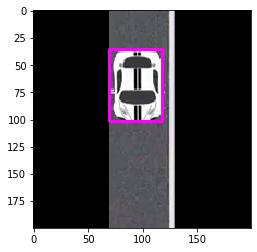

Minimum SSR position ：  9360 , with value :  577800.675209893 , Shape of SSRs map :  (20083,)
Tracked point :  [94, 83]


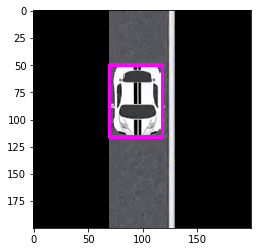

Minimum SSR position ：  9375 , with value :  779229.4656043574 , Shape of SSRs map :  (20083,)
Tracked point :  [94, 98]


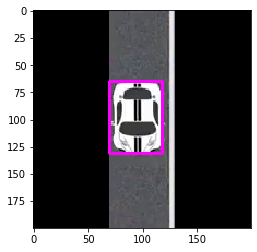

Minimum SSR position ：  9410 , with value :  323639.78041258105 , Shape of SSRs map :  (20083,)
Tracked point :  [94, 133]


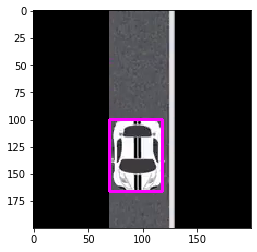

Minimum SSR position ：  9418 , with value :  720730.862101255 , Shape of SSRs map :  (20083,)
Tracked point :  [94, 141]


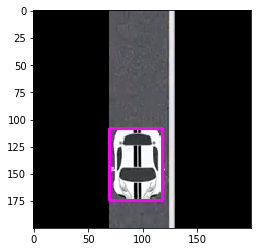

In [15]:
rois = []
num_tracked_frame = len(fnames)-1
# num_tracked_frame = 1

for frame_index in range(num_tracked_frame):
    tracked_frame = cv2.imread(imgs_path + fnames[frame_index+1])
    crops = []
    for x in range(w-window_w-1):
        for y in range(h-window_h-1):
            background = np.zeros((h,w,3)).astype('uint8')
            x1,x2,y1,y2 = x,x+window_w,y,y+window_h
            crop = tracked_frame[y1:y2,x1:x2].flatten()
            crops.append(crop)
    crops = np.array(crops)   
    
    tracked_frame_features = pca.transform(crops.reshape(crops.shape[0],-1)) # Feature extraction by PCA
    ssrs = np.sum((tracked_frame_features - reference_frame_features[kp_index])**2,axis = 1)
    print('Minimum SSR position ： ', np.argmin(ssrs),', with value : ',np.min(ssrs),', Shape of SSRs map : ', ssrs.shape)
    tracked_keypoint = poses[np.argmin(ssrs)]
    x1,x2 = tracked_keypoint[0] - window_w//2, tracked_keypoint[0] + window_w//2
    y1,y2 = tracked_keypoint[1] - window_h//2, tracked_keypoint[1] + window_h//2
    print('Tracked point : ', tracked_keypoint)
    tracked_frame_features_with_tracked_kp = tracked_frame.copy()
    tracked_frame_features_with_tracked_kp = cv2.rectangle(tracked_frame_features_with_tracked_kp, (x1,y1),(x2,y2), (255,0,255),2)
    plt.imshow(tracked_frame_features_with_tracked_kp)
    plt.show()
    cv2.imwrite(save_visu_path+ fnames[frame_index+1], tracked_frame_features_with_tracked_kp)

# Animation production

In [18]:
import imageio

file = os.listdir(save_visu_path)
file.sort()
file.sort(key = lambda x: int(x[:-4]))

frames = []
for frame_index in range(len(file)):
    frames.append(cv2.cvtColor(cv2.imread(save_visu_path+file[frame_index]), cv2.COLOR_BGR2RGB))
with imageio.get_writer("demo.gif", mode="I",fps=5) as writer:
    for idx, frame in enumerate(frames):
        print("Adding frame to GIF file: ", idx + 1)
        writer.append_data(frame)

Adding frame to GIF file:  1
Adding frame to GIF file:  2
Adding frame to GIF file:  3
Adding frame to GIF file:  4
Adding frame to GIF file:  5
